<a href="https://colab.research.google.com/github/SatyaanikaPandam/Data-Science/blob/main/Saty_PandU9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
I’ve always been curious about how nutrition, especially calorie count, relates to what we eat and how machine learning could help make predictions about it. This dataset includes real-world nutritional stats like fats, carbs, sugars, and protein across a variety of foods, which I thought was interesting because we constantly see "calories" on labels, but rarely think about what actually predicts those numbers.

In [96]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [97]:
calories = pd.read_csv('https://raw.githubusercontent.com/SatyaanikaPandam/Data-Science/refs/heads/main/100%20calories%20data%20-%20Sheet1.csv')

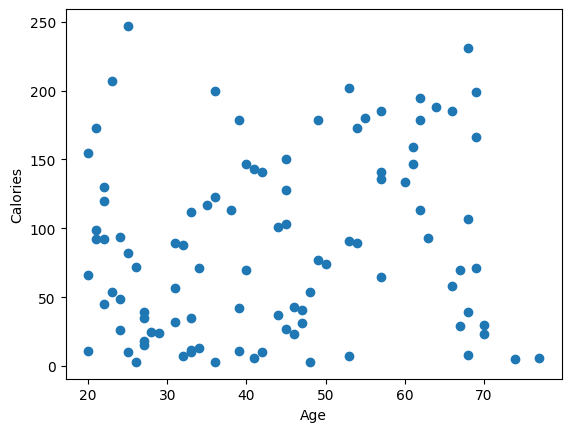

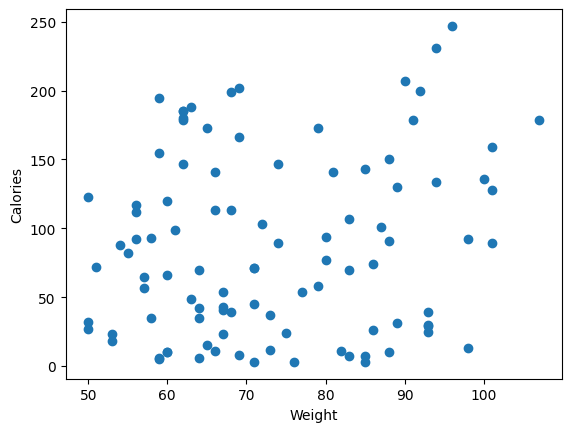

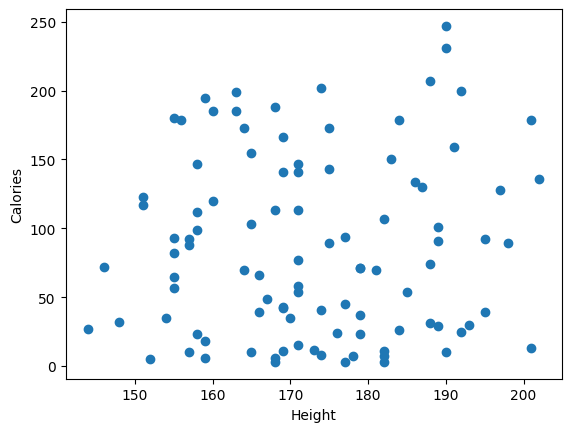

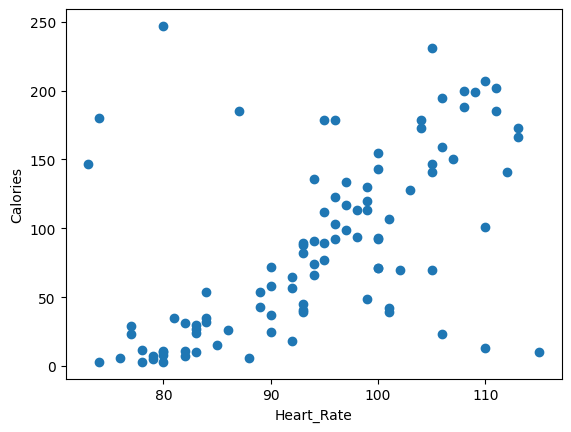

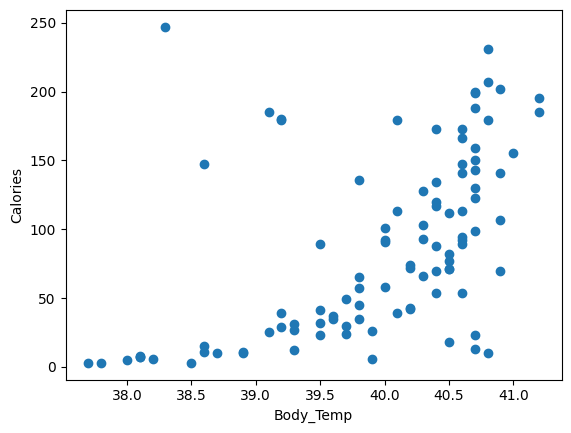

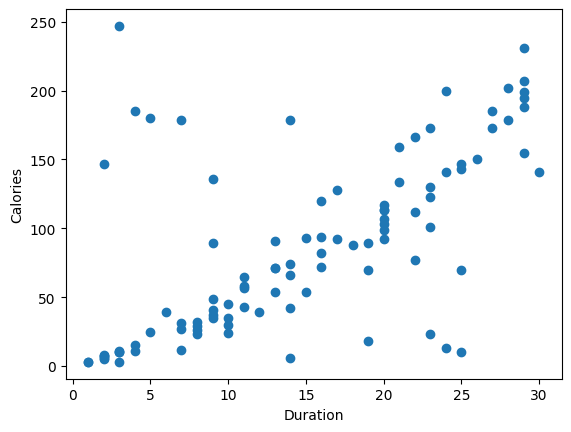

In [98]:
x = ["Age", "Weight", "Height", "Heart_Rate", "Body_Temp", "Duration"]
y = "Calories"
for a in x:
  plt.scatter(calories[a], calories[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

When I looked at the scatter plots, Duration had a super clear upward trend with calories burned, which makes sense. Like, if you work out longer, you're probably burning more energy. Body temp and heart rate had a kind of medium strong relationship too which also makes sense if you're getting sweaty and your heart's pumping, you're doing work. Height and weight were all over the place,probably because height alone doesn’t really say much about how active someone is. And Age barely showed a trend at all.

In [99]:
data = calories.drop(columns=["Gender"])
X = data.drop(columns=["Calories"]).values
y = data["Calories"].values

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y.reshape(-1, 1), test_size=0.2, random_state=42
)

In [102]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Model 1

In [103]:
model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1], out_features=10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

In [104]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [105]:
epochs = 500
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [106]:
    model.eval() # Set model to evaluation mode
    with torch.inference_mode():
        test_pred = model(X_test_tensor)
        test_loss = loss_fn(test_pred, y_test_tensor)

    # Append losses for plotting later
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

In [107]:
# Turn on evaluation mode
model.eval()

# Make predictions (inference)
with torch.inference_mode():
    # Pass the PyTorch tensor X_test_tensor to the model
    y_preds = model(X_test_tensor)

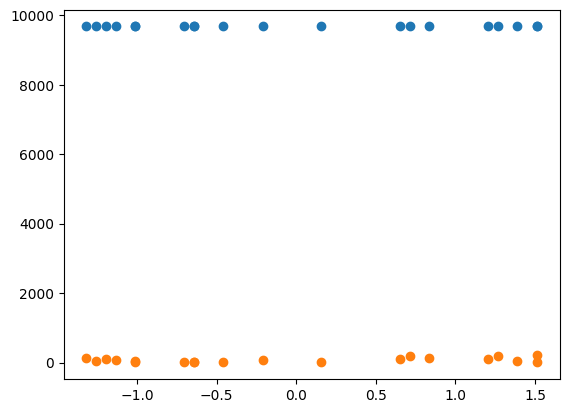

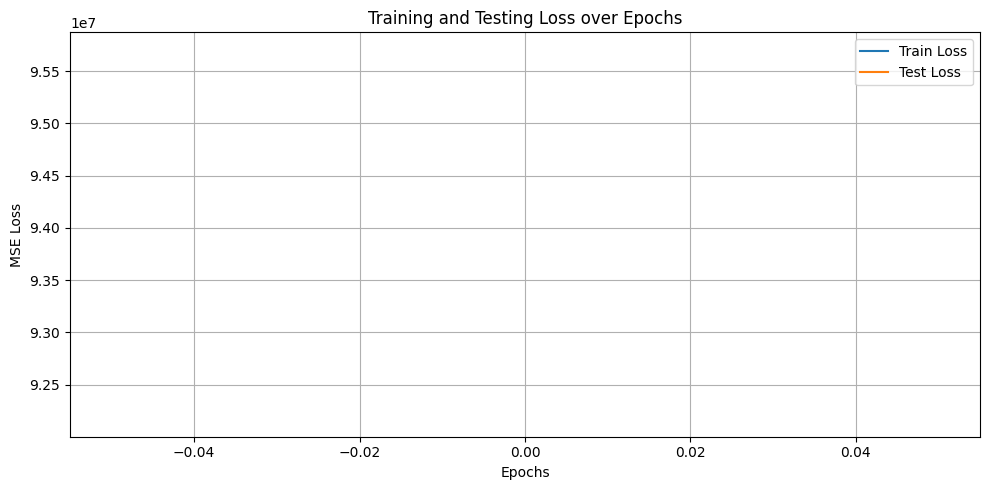

In [108]:
# Turn on evaluation mode
model.eval()

# Make predictions (inference)
with torch.inference_mode():
    # Pass the PyTorch tensor X_test_tensor to the model
    y_preds = model(X_test_tensor)

# Select one feature from X_test_tensor for plotting
# For example, let's choose the first feature (index 0)
# You might need to adjust this index based on which feature you want to visualize
x_plot_data = X_test_tensor[:, 0].detach().numpy()

plt.scatter(x_plot_data, y_preds.detach().numpy())
plt.scatter(x_plot_data, y_test_tensor.detach().numpy())

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Testing Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

So this plot is supposed to show how training loss and testing loss change over time (across epochs), but it’s looking kinda... wrong. Instead of nice, connected line plots that gradually go down or change shape, we’re just seeing a bunch of scattered dots.

# Model 2

In [109]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=1, out_features=7),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

In [110]:

# Create a loss function
loss_fn = nn.MSELoss()
# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [111]:

epochs = 2000
for epoch in range(epochs):
    ### Training
    #this allows our matrices to update
    model.train()  # Use the 'model' created in the preceding code
    # 1. Forward pass; makes predictions
    y_pred = model(X_train_tensor) # Use the tensor data
    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train_tensor) # Use the tensor data and loss_fn
    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad() # Use the 'optimizer' created in the preceding code
    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()
    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()
    ### Testing
    model.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model(X_test_tensor) # Use the tensor data
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test_tensor) # Use the tensor data and loss_fn
    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")



Epoch: 0 | Train loss: 91905208.00000, Test loss: 88533736.00000
Epoch: 200 | Train loss: 32548.93359, Test loss: 36506.34766
Epoch: 400 | Train loss: 4129.38037, Test loss: 4591.38770
Epoch: 600 | Train loss: 4120.58936, Test loss: 4501.67334
Epoch: 800 | Train loss: 4120.58691, Test loss: 4500.24121
Epoch: 1000 | Train loss: 4120.58643, Test loss: 4500.22119
Epoch: 1200 | Train loss: 4120.58643, Test loss: 4500.22119
Epoch: 1400 | Train loss: 4120.58643, Test loss: 4500.22119
Epoch: 1600 | Train loss: 4120.58643, Test loss: 4500.22119
Epoch: 1800 | Train loss: 4120.58643, Test loss: 4500.22119


In [112]:

# Turn on evaluation mode
model.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model(X_test_tensor)



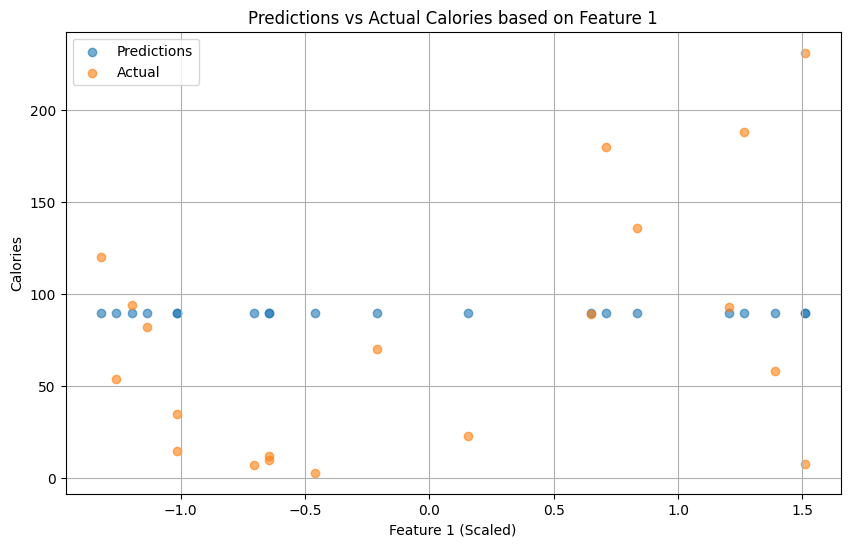

In [113]:

feature_to_plot_index = 0

plt.figure(figsize=(10, 6))
plt.scatter(X_test_tensor[:, feature_to_plot_index].detach().numpy(), y_preds.detach().numpy(), label='Predictions', alpha=0.6)
plt.scatter(X_test_tensor[:, feature_to_plot_index].detach().numpy(), y_test_tensor.detach().numpy(), label='Actual', alpha=0.6)
plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1}')
plt.legend()
plt.grid(True)
plt.show()

This graph looks almost identical to Model one.  

# Model 3

In [114]:
 # Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    # our input has 6 dimensions/features
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=32,),
    nn.RReLU(),

    # hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    # moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    # hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    # hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    # outputs a vector of predicted weights
)

# Create a loss function (already defined, keeping for context)
# loss_fn = nn.MSELoss()

# Create an optimizer (already defined, keeping for context)
# Ensure the optimizer is re-created with the parameters of the corrected model_1
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

epochs = 2000
for epoch in range(epochs):
    model_1.train()
    # The shape mismatch was here because the first layer expected 1 feature, but got 6
    y_pred = model_1(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(X_test_tensor)
      test_loss = loss_fn(test_pred, y_test_tensor)
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 12100.84375, Test loss: 9934.19238
Epoch: 200 | Train loss: 2036.68945, Test loss: 2659.80933
Epoch: 400 | Train loss: 1612.58606, Test loss: 2960.81885
Epoch: 600 | Train loss: 1146.00171, Test loss: 3425.34106
Epoch: 800 | Train loss: 950.58453, Test loss: 3867.45703
Epoch: 1000 | Train loss: 569.92670, Test loss: 3424.06128
Epoch: 1200 | Train loss: 443.75726, Test loss: 3097.55640
Epoch: 1400 | Train loss: 780.49152, Test loss: 3409.01758
Epoch: 1600 | Train loss: 345.23126, Test loss: 3055.30811
Epoch: 1800 | Train loss: 426.96548, Test loss: 2957.27905


In [115]:

# Turn on evaluation mode
model_1.eval()
# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test_tensor) # Use X_test_tensor for predictions

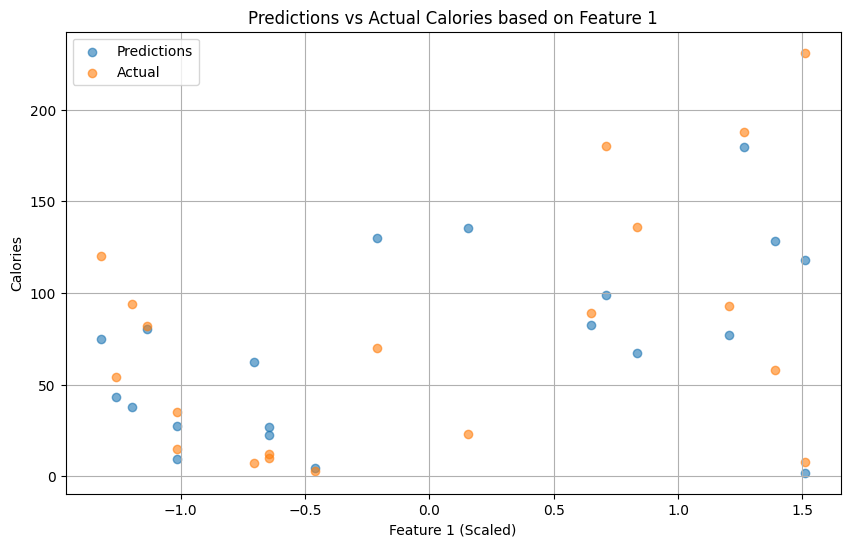

In [116]:
x_plot_data = X_test_tensor[:, 0].detach().numpy()

plt.figure(figsize=(10, 6))
# Plot predictions
plt.scatter(x_plot_data, y_preds.detach().numpy(), label='Predictions', alpha=0.6)
# Plot actual test data
plt.scatter(x_plot_data, y_test_tensor.detach().numpy(), label='Actual', alpha=0.6)

plt.xlabel(f'Feature 1 (Scaled)') # Update label to reflect the chosen feature
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature 1') # Update title
plt.legend()
plt.grid(True)
plt.show()

# Model 4

Epoch [100/1000], Train Loss: 12027.3906, Test Loss: 9871.3262
Epoch [200/1000], Train Loss: 10920.8799, Test Loss: 8949.6699
Epoch [300/1000], Train Loss: 7851.4219, Test Loss: 6416.4507
Epoch [400/1000], Train Loss: 4300.3550, Test Loss: 3732.2566
Epoch [500/1000], Train Loss: 2689.3291, Test Loss: 2809.1604
Epoch [600/1000], Train Loss: 2367.5713, Test Loss: 2790.6235
Epoch [700/1000], Train Loss: 2280.5125, Test Loss: 2837.8660
Epoch [800/1000], Train Loss: 2218.9473, Test Loss: 2816.4204
Epoch [900/1000], Train Loss: 2162.0693, Test Loss: 2764.3413
Epoch [1000/1000], Train Loss: 2106.4338, Test Loss: 2691.8564


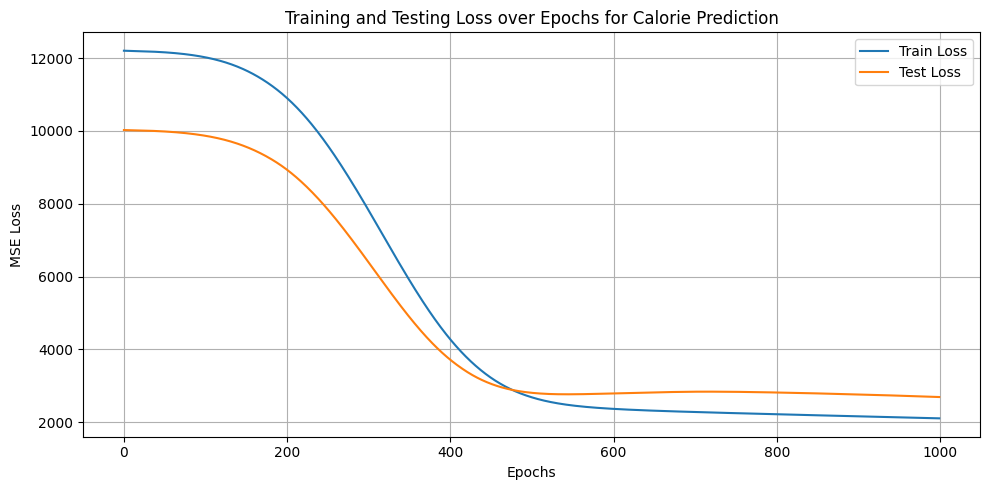

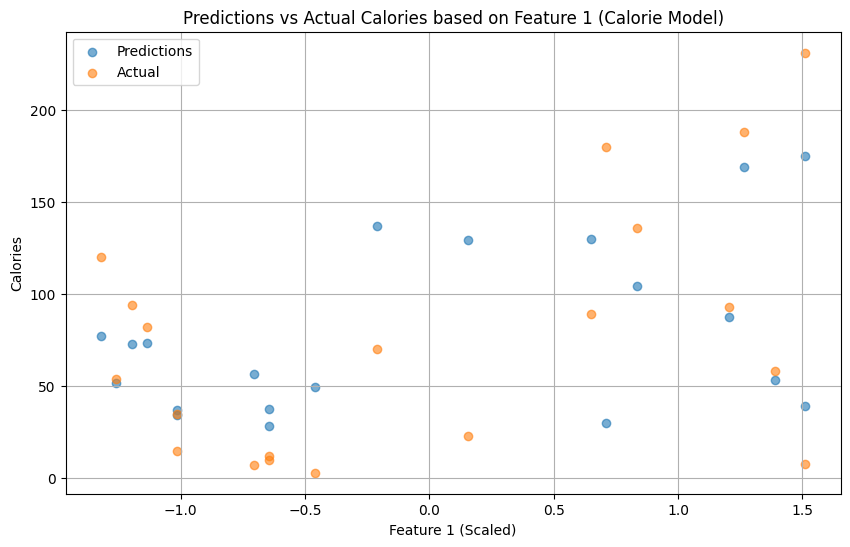

In [117]:

model_cal = nn.Sequential(
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=16),  # Input layer (matches features) to hidden layer (16 neurons)
    nn.ReLU(),
    nn.Linear(16, 8),  # Hidden layer to another hidden layer
    nn.ReLU(),
    nn.Linear(8, 1)  # Hidden layer to output layer (1 output for calories)
)

# Define the loss function and optimizer
# Use the existing criterion (MSELoss) and create a new optimizer for this model
criterion_cal = nn.MSELoss()
optimizer_cal = optim.Adam(model_cal.parameters(), lr=0.001)

# Training loop for the calorie model
num_epochs_cal = 1000
train_losses_cal = []
test_losses_cal = []

for epoch in range(num_epochs_cal):
    # Forward pass
    model_cal.train()
    outputs_cal = model_cal(X_train_tensor)
    loss_cal = criterion_cal(outputs_cal.squeeze(), y_train_tensor.squeeze()) # Use squeeze if y_train_tensor is (batch_size, 1)

    # Backward pass and optimization
    optimizer_cal.zero_grad()
    loss_cal.backward()
    optimizer_cal.step()

    # Evaluation
    model_cal.eval()
    with torch.inference_mode():
        test_outputs_cal = model_cal(X_test_tensor)
        test_loss_cal = criterion_cal(test_outputs_cal.squeeze(), y_test_tensor.squeeze())

    train_losses_cal.append(loss_cal.item())
    test_losses_cal.append(test_loss_cal.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_cal}], Train Loss: {loss_cal.item():.4f}, Test Loss: {test_loss_cal.item():.4f}')

# Save the trained model
torch.save(model_cal.state_dict(), 'calorie_prediction_model.pth')

# Plot training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses_cal, label="Train Loss")
plt.plot(test_losses_cal, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Testing Loss over Epochs for Calorie Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting predictions vs actual for a specific feature (e.g., the first one)
model_cal.eval()
with torch.inference_mode():
    y_preds_cal = model_cal(X_test_tensor)

feature_to_plot_index = 0

plt.figure(figsize=(10, 6))
plt.scatter(X_test_tensor[:, feature_to_plot_index].detach().numpy(), y_preds_cal.detach().numpy(), label='Predictions', alpha=0.6)
plt.scatter(X_test_tensor[:, feature_to_plot_index].detach().numpy(), y_test_tensor.detach().numpy(), label='Actual', alpha=0.6)
plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Calorie Model)')
plt.legend()
plt.grid(True)
plt.show()


# Model 5

In [118]:
y_preds_cal.shape

torch.Size([20, 1])

In [119]:

X_train.shape


(79, 6)

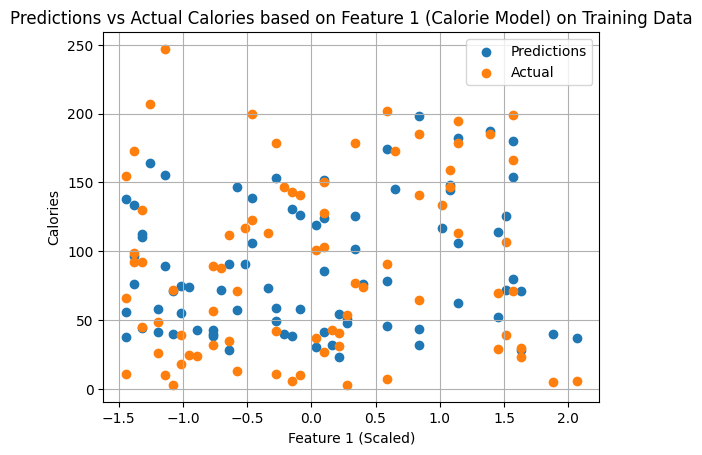

In [120]:
outputs = model_cal(X_train_tensor)
plt.scatter(X_train_tensor[:, 0].detach().numpy(), outputs.detach().numpy())
plt.scatter(X_train_tensor[:, 0].detach().numpy(), y_train_tensor.detach().numpy())
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Calories')
plt.title('Predictions vs Actual Calories based on Feature 1 (Calorie Model) on Training Data')
plt.legend(['Predictions', 'Actual'])
plt.grid(True)
plt.show()

In [121]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    # our input has 6 dimensions/features, matching X_train_tensor.shape[1]
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=32,),
    nn.RReLU(),

    # hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    # moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    # hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    # hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    # outputs a vector of predicted weights
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
# Recreate the optimizer to include the parameters of the new model_1
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    # Use the PyTorch tensor X_train_tensor instead of the numpy array X_train
    y_pred = model_1(X_train_tensor)

    # 2. Calculate loss; how bad were our predictions?
    # Use the PyTorch tensor y_train_tensor instead of the numpy array y_train
    # Ensure y_pred and y_train_tensor have compatible shapes for the loss function
    # y_pred shape: (batch_size, 1), y_train_tensor shape: (batch_size, 1)
    # MSELoss expects the shapes to be the same or broadcastable. Squeezing y_pred to (batch_size)
    # and y_train_tensor to (batch_size) is a common practice here.
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())


    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      # Use the PyTorch tensor X_test_tensor instead of the numpy array X_test
      test_pred = model_1(X_test_tensor)
      # 2. Calculate the loss, but with test data
      # Use the PyTorch tensor y_test_tensor instead of the numpy array y_test
      # Ensure test_pred and y_test_tensor have compatible shapes
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 12210.23438, Test loss: 10025.66113
Epoch: 200 | Train loss: 2061.13452, Test loss: 2589.02783
Epoch: 400 | Train loss: 1836.89453, Test loss: 3298.32886
Epoch: 600 | Train loss: 1517.35010, Test loss: 3822.32227
Epoch: 800 | Train loss: 949.62775, Test loss: 4151.58301
Epoch: 1000 | Train loss: 812.59955, Test loss: 4219.27637
Epoch: 1200 | Train loss: 625.61890, Test loss: 4173.89355
Epoch: 1400 | Train loss: 340.90250, Test loss: 4048.94995
Epoch: 1600 | Train loss: 515.54602, Test loss: 4314.19482
Epoch: 1800 | Train loss: 410.51578, Test loss: 3813.93115


# Model 6

In [122]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [123]:
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    # Pass the PyTorch tensor X_test_tensor to the model
    y_preds = model_1(X_test_tensor)

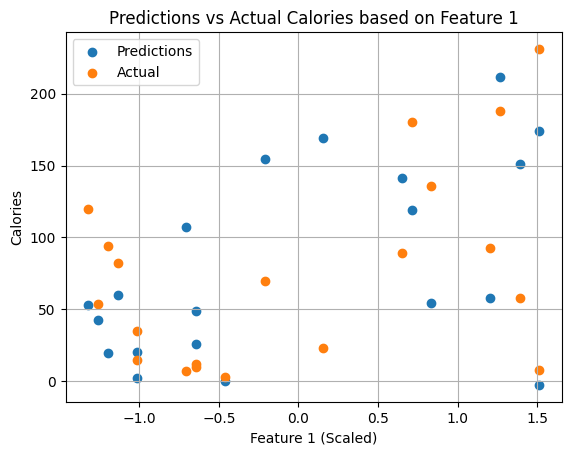

In [124]:
feature_to_plot_index = 0
plt.scatter(X_test[:, feature_to_plot_index], y_preds.detach().numpy())

#plots test data
# Remove .detach() from X_test as it's already a NumPy array
# Use the same feature from X_test for the x-axis
plt.scatter(X_test[:, feature_to_plot_index], y_test)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)') # Add labels for clarity
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1}') # Add a title
plt.legend(['Predictions', 'Actual']) # Add a legend
plt.grid(True) # Add a grid
plt.show() # Show the plot

# Model 7

In [125]:
# Two layer nn with nn.Sequential
model_2 = nn.Sequential(
    # our input has 6 dimensions/features, matching X_train_tensor.shape[1]
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=32,),
    nn.RReLU(),

    # hidden layer with 32 nodes
    # Corrected: in_features should be 32 to match the output of the previous layer
    nn.Linear(in_features=32, out_features=32, ),
    nn.RReLU(),

    # moves to hidden layer with 16 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    # hidden layer with 8 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    # hidden layer with 4 nodes
    nn.Linear(in_features=8, out_features=1, ),
    # outputs a vector of predicted weights
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
# Recreate the optimizer to include the parameters of the new model_2
# Note: The original code was using model_1's parameters for the optimizer.
# We should use model_2's parameters as we are training model_2.
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    # Ensure model_2 is set to train mode
    model_2.train()

    # 1. Forward pass; makes predictions
    # Use the PyTorch tensor X_train_tensor instead of the numpy array X_train
    y_pred = model_2(X_train_tensor)

    # 2. Calculate loss; how bad were our predictions?
    # Use the PyTorch tensor y_train_tensor instead of the numpy array y_train
    # Ensure y_pred and y_train_tensor have compatible shapes for the loss function
    # y_pred shape: (batch_size, 1), y_train_tensor shape: (batch_size, 1)
    # MSELoss expects the shapes to be the same or broadcastable. Squeezing y_pred to (batch_size)
    # and y_train_tensor to (batch_size) is a common practice here.
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())


    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    # Ensure model_2 is set to evaluation mode
    model_2.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      # Use the PyTorch tensor X_test_tensor instead of the numpy array X_test
      test_pred = model_2(X_test_tensor)
      # 2. Calculate the loss, but with test data
      # Use the PyTorch tensor y_test_tensor instead of the numpy array y_test
      # Ensure test_pred and y_test_tensor have compatible shapes
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 12121.29297, Test loss: 9950.87500
Epoch: 200 | Train loss: 1943.27991, Test loss: 2841.61377
Epoch: 400 | Train loss: 1518.18311, Test loss: 3784.08472
Epoch: 600 | Train loss: 1336.76624, Test loss: 5387.49707
Epoch: 800 | Train loss: 805.80463, Test loss: 5370.78027
Epoch: 1000 | Train loss: 499.94421, Test loss: 4470.34326
Epoch: 1200 | Train loss: 990.72461, Test loss: 4893.43457
Epoch: 1400 | Train loss: 245.89568, Test loss: 4731.86328
Epoch: 1600 | Train loss: 265.77396, Test loss: 4365.33691
Epoch: 1800 | Train loss: 238.59932, Test loss: 4624.88379


In [126]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [127]:
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    # Pass the PyTorch tensor X_test_tensor to the model
    y_preds = model_2(X_test_tensor)

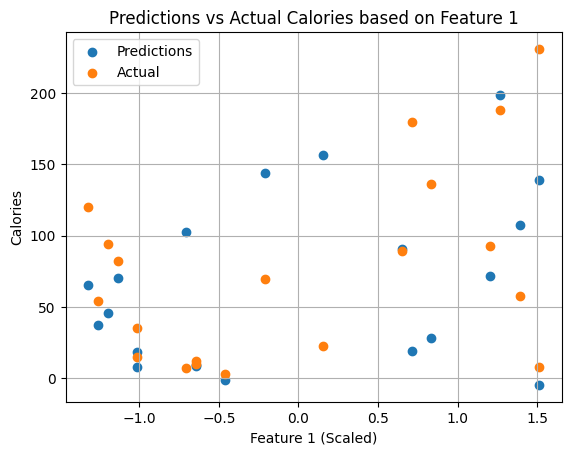

In [128]:
feature_to_plot_index = 0
plt.scatter(X_test[:, feature_to_plot_index], y_preds.detach().numpy())

#plots test data
# Remove .detach() from X_test as it's already a NumPy array
# Use the same feature from X_test for the x-axis
plt.scatter(X_test[:, feature_to_plot_index], y_test)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)') # Add labels for clarity
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1}') # Add a title
plt.legend(['Predictions', 'Actual']) # Add a legend
plt.grid(True) # Add a grid
plt.show() # Show the plot

# Model 8

Training model_3 with fewer nodes...
Epoch: 0 | Train loss: 12088.45508, Test loss: 9922.49805
Epoch: 200 | Train loss: 2090.66724, Test loss: 2608.92285
Epoch: 400 | Train loss: 1990.56189, Test loss: 2622.82886
Epoch: 600 | Train loss: 1936.19934, Test loss: 2580.56885
Epoch: 800 | Train loss: 1928.79871, Test loss: 2584.20850
Epoch: 1000 | Train loss: 1881.66394, Test loss: 2590.37549
Epoch: 1200 | Train loss: 1842.43457, Test loss: 2560.25781
Epoch: 1400 | Train loss: 1786.92004, Test loss: 2537.93384
Epoch: 1600 | Train loss: 1703.16748, Test loss: 2530.76172
Epoch: 1800 | Train loss: 1576.38599, Test loss: 2560.04321

Training finished for model_3.


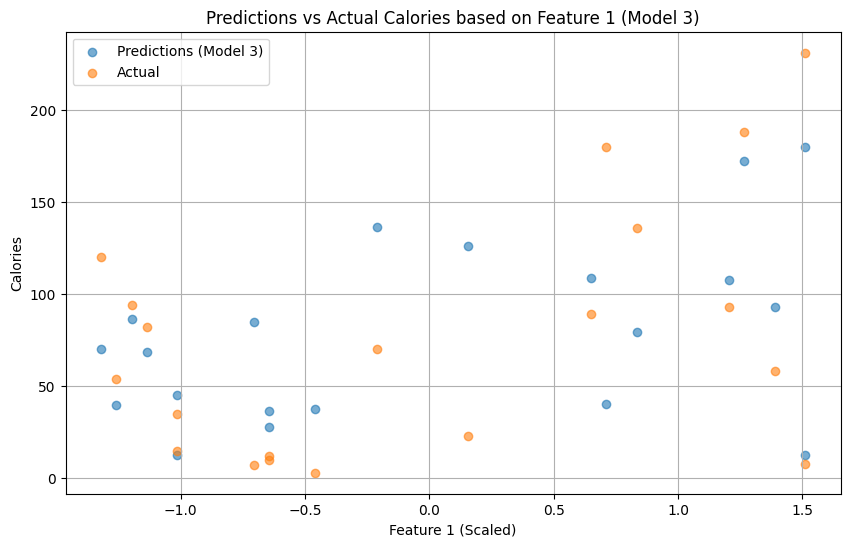


Training model_4 with more nodes and layers...
Epoch: 0 | Train loss: 12114.61426, Test loss: 9946.65918
Epoch: 200 | Train loss: 1821.19519, Test loss: 2772.08423
Epoch: 400 | Train loss: 1594.63416, Test loss: 3432.03760
Epoch: 600 | Train loss: 1412.82690, Test loss: 3756.24536
Epoch: 800 | Train loss: 896.72675, Test loss: 4031.62549
Epoch: 1000 | Train loss: 649.51178, Test loss: 4115.41992
Epoch: 1200 | Train loss: 529.87897, Test loss: 4178.59570
Epoch: 1400 | Train loss: 471.99307, Test loss: 3613.32544
Epoch: 1600 | Train loss: 187.47659, Test loss: 3613.35669
Epoch: 1800 | Train loss: 243.28336, Test loss: 3279.89893

Training finished for model_4.


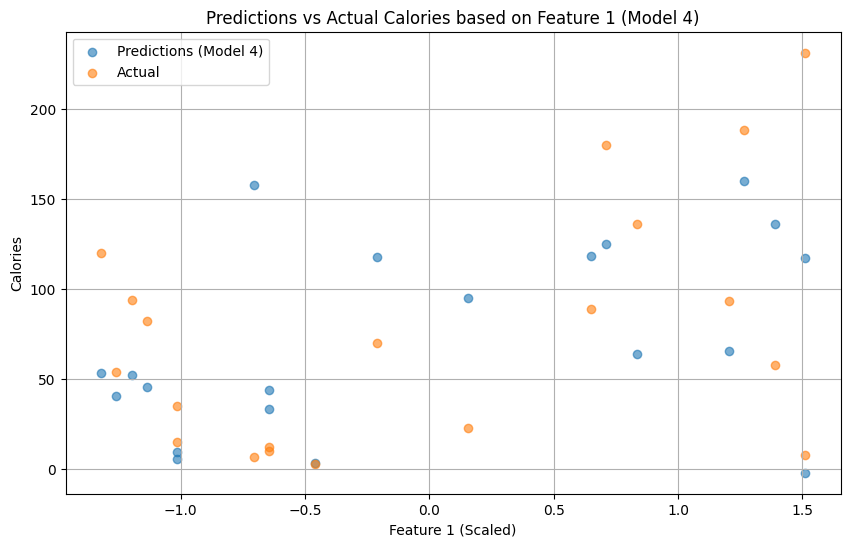

In [129]:

model_3 = nn.Sequential(
    # Input layer to first hidden layer (e.g., 8 nodes)
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=8),
    nn.RReLU(), # Using RReLU as in the previous examples

    # First hidden layer to second hidden layer (e.g., 4 nodes)
    nn.Linear(in_features=8, out_features=4),
    nn.RReLU(),

    # Second hidden layer to output layer (1 node for calories)
    nn.Linear(in_features=4, out_features=1)
)

# Create a loss function (using the existing one)
# loss_fn = nn.MSELoss()

# Create an optimizer for the new model (using the same learning rate as model_2)
optimizer_3 = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.0001)

# Set the number of epochs (using the same number as model_2)
epochs = 2000

print("Training model_3 with fewer nodes...")

for epoch in range(epochs):
    ### Training
    model_3.train()
    y_pred = model_3(X_train_tensor)
    # Squeeze is used to match the shape of y_train_tensor
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())

    optimizer_3.zero_grad()
    loss.backward()
    optimizer_3.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      test_pred = model_3(X_test_tensor)
      # Squeeze is used to match the shape of y_test_tensor
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

print("\nTraining finished for model_3.")

# Evaluate and plot results for model_3

model_3.eval()
with torch.inference_mode():
    y_preds_3 = model_3(X_test_tensor)

# Assuming you want to plot against the first feature as in previous examples
feature_to_plot_index = 0

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_to_plot_index], y_preds_3.detach().numpy(), label='Predictions (Model 3)', alpha=0.6)
plt.scatter(X_test[:, feature_to_plot_index], y_test, label='Actual', alpha=0.6)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Model 3)')
plt.legend()
plt.grid(True)
plt.show()

# Let's create another model with more nodes and potentially more layers

model_4 = nn.Sequential(
    # Input layer to first hidden layer (e.g., 64 nodes)
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=64),
    nn.RReLU(),

    # First hidden layer to second hidden layer (e.g., 32 nodes)
    nn.Linear(in_features=64, out_features=32),
    nn.RReLU(),

    # Second hidden layer to third hidden layer (e.g., 16 nodes)
    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),

    # Third hidden layer to fourth hidden layer (e.g., 8 nodes)
    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),

    # Fourth hidden layer to output layer (1 node)
    nn.Linear(in_features=8, out_features=1)
)

# Create an optimizer for the new model (using the same learning rate)
optimizer_4 = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.0001)

print("\nTraining model_4 with more nodes and layers...")

for epoch in range(epochs):
    ### Training
    model_4.train()
    y_pred = model_4(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())

    optimizer_4.zero_grad()
    loss.backward()
    optimizer_4.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      test_pred = model_4(X_test_tensor)
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

print("\nTraining finished for model_4.")

# Evaluate and plot results for model_4

model_4.eval()
with torch.inference_mode():
    y_preds_4 = model_4(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_to_plot_index], y_preds_4.detach().numpy(), label='Predictions (Model 4)', alpha=0.6)
plt.scatter(X_test[:, feature_to_plot_index], y_test, label='Actual', alpha=0.6)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Model 4)')
plt.legend()
plt.grid(True)
plt.show()


# Model 9


Training model_5 with even more nodes and layers...
Epoch: 0 | Train loss: 12123.29199, Test loss: 9952.78809
Epoch: 200 | Train loss: 2433.44531, Test loss: 3109.41870
Epoch: 400 | Train loss: 1496.37732, Test loss: 3283.05981
Epoch: 600 | Train loss: 571.15765, Test loss: 3231.43921
Epoch: 800 | Train loss: 527.15881, Test loss: 3516.40698
Epoch: 1000 | Train loss: 234.89398, Test loss: 3500.24658
Epoch: 1200 | Train loss: 179.66106, Test loss: 3241.31323
Epoch: 1400 | Train loss: 171.69803, Test loss: 3123.23779
Epoch: 1600 | Train loss: 51.06169, Test loss: 3186.94580
Epoch: 1800 | Train loss: 262.92743, Test loss: 3288.59619

Training finished for model_5.


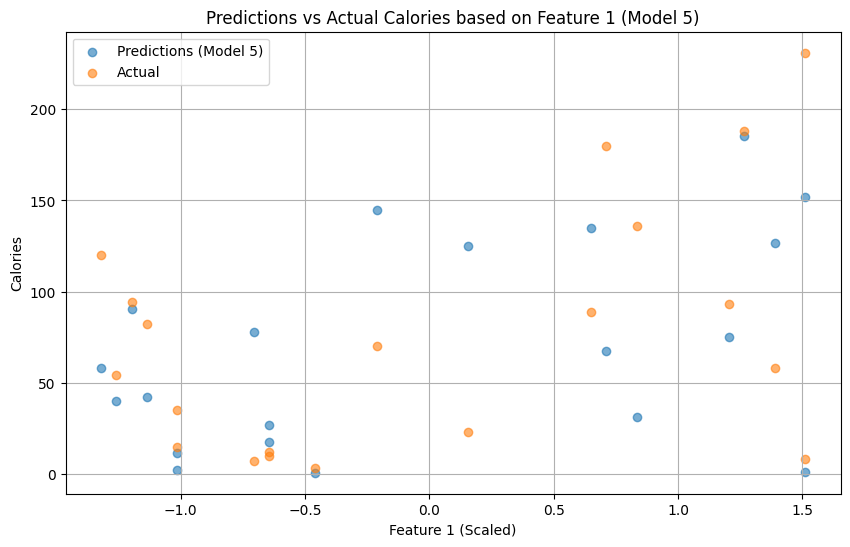

In [130]:
model_5 = nn.Sequential(
    # Input layer to first hidden layer (e.g., 128 nodes)
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=128),
    nn.RReLU(),

    # First hidden layer to second hidden layer (e.g., 64 nodes)
    nn.Linear(in_features=128, out_features=64),
    nn.RReLU(),

    # Second hidden layer to third hidden layer (e.g., 32 nodes)
    nn.Linear(in_features=64, out_features=32),
    nn.RReLU(),

    # Third hidden layer to fourth hidden layer (e.g., 16 nodes)
    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),

    # Fourth hidden layer to fifth hidden layer (e.g., 8 nodes)
    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),

    # Fifth hidden layer to output layer (1 node)
    nn.Linear(in_features=8, out_features=1)
)

# Create an optimizer for the new model (using the same learning rate)
optimizer_5 = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.0001)

print("\nTraining model_5 with even more nodes and layers...")

for epoch in range(epochs): # Using the same number of epochs as before
    ### Training
    model_5.train()
    y_pred = model_5(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())

    optimizer_5.zero_grad()
    loss.backward()
    optimizer_5.step()

    ### Testing
    model_5.eval()
    with torch.inference_mode():
      test_pred = model_5(X_test_tensor)
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

print("\nTraining finished for model_5.")

# Evaluate and plot results for model_5

model_5.eval()
with torch.inference_mode():
    y_preds_5 = model_5(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_to_plot_index], y_preds_5.detach().numpy(), label='Predictions (Model 5)', alpha=0.6)
plt.scatter(X_test[:, feature_to_plot_index], y_test, label='Actual', alpha=0.6)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Model 5)')
plt.legend()
plt.grid(True)
plt.show()


In [131]:
model = nn.Sequential(
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=16),
    nn.ReLU(),  # nonlinear activation
    nn.Linear(16, 8),
    nn.ReLU(),  # nonlinear activation
    nn.Linear(8, 1)
)


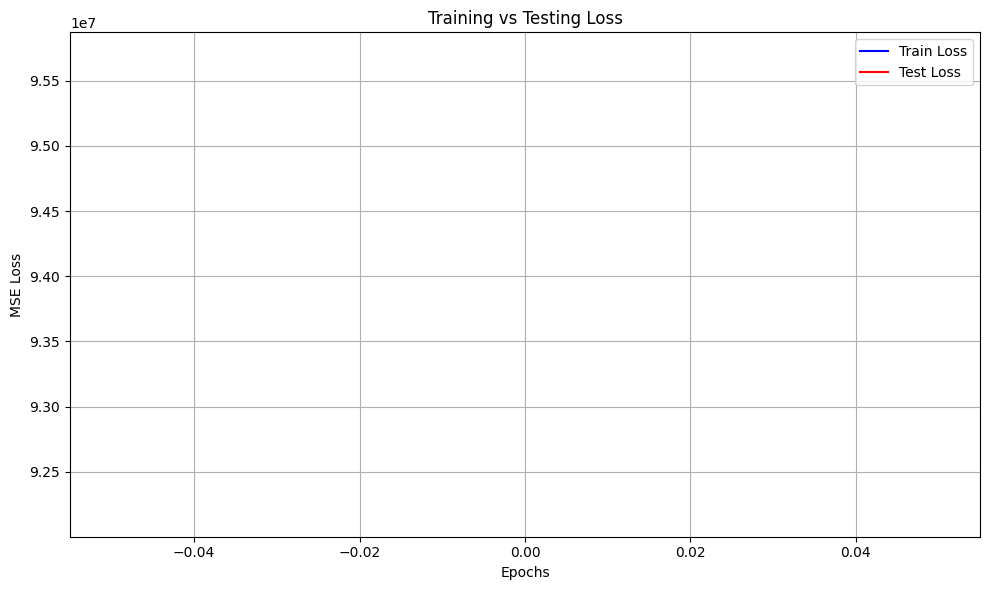

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Model 10

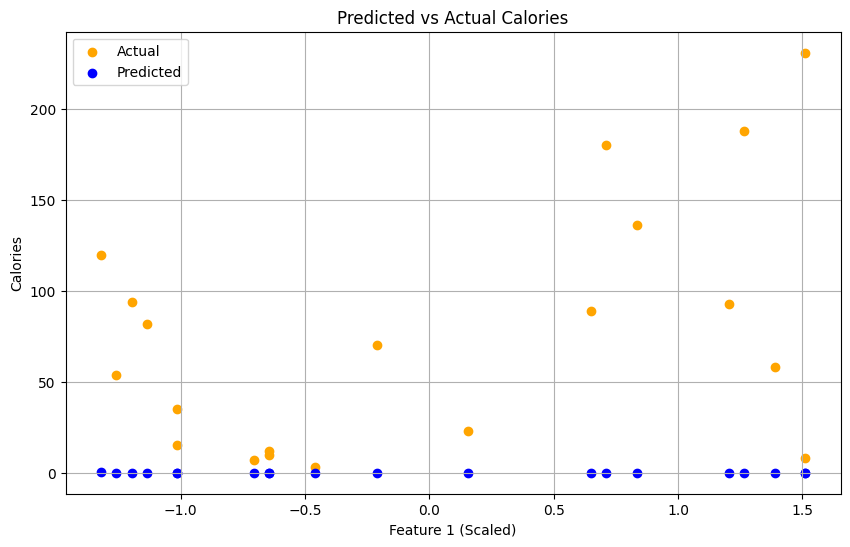

In [133]:
with torch.inference_mode():
    predictions = model(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_tensor[:, 0].detach().numpy(), y_test_tensor.detach().numpy(), color="orange", label="Actual")
plt.scatter(X_test_tensor[:, 0].detach().numpy(), predictions.detach().numpy(), color="blue", label="Predicted")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Calories")
plt.title("Predicted vs Actual Calories")
plt.legend()
plt.grid(True)
plt.show()


In [134]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c="blue", s=10, label="Train")
    plt.scatter(test_data, test_labels, c="orange", s=10, label="Test")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="blue", s=10, label="Predicted")
    plt.legend()
    plt.title("Neural Network Results")
    plt.xlabel("Feature (Scaled)")
    plt.ylabel("Target")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


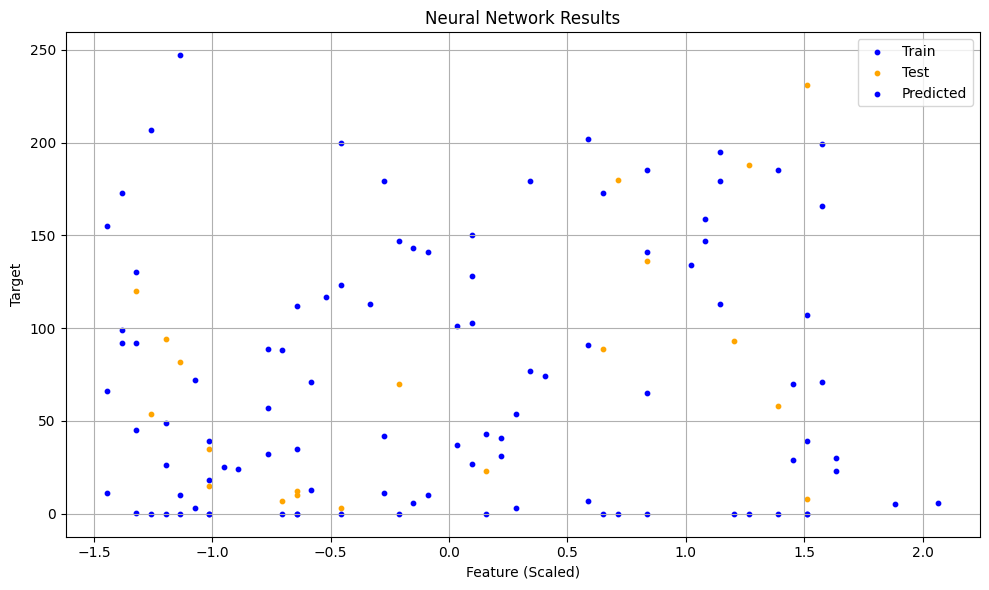

In [135]:
plot_predictions(X_train_tensor[:, 0].detach().numpy(),
                 y_train_tensor.detach().numpy(),
                 X_test_tensor[:, 0].detach().numpy(),
                 y_test_tensor.detach().numpy(),
                 predictions.detach().numpy())


In [136]:
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 1000


In [137]:

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_tensor)
        test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze())

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")


Epoch 100/1000 | Train Loss: 7414.4390 | Test Loss: 6077.8579
Epoch 200/1000 | Train Loss: 2253.7009 | Test Loss: 2704.9885
Epoch 300/1000 | Train Loss: 2114.4185 | Test Loss: 2654.5786
Epoch 400/1000 | Train Loss: 1933.2601 | Test Loss: 2521.7065
Epoch 500/1000 | Train Loss: 1687.2188 | Test Loss: 2383.6470
Epoch 600/1000 | Train Loss: 1405.3118 | Test Loss: 2329.2095
Epoch 700/1000 | Train Loss: 1129.0431 | Test Loss: 2305.8462
Epoch 800/1000 | Train Loss: 887.4876 | Test Loss: 2358.2773
Epoch 900/1000 | Train Loss: 707.3754 | Test Loss: 2402.1499
Epoch 1000/1000 | Train Loss: 572.8900 | Test Loss: 2595.3892


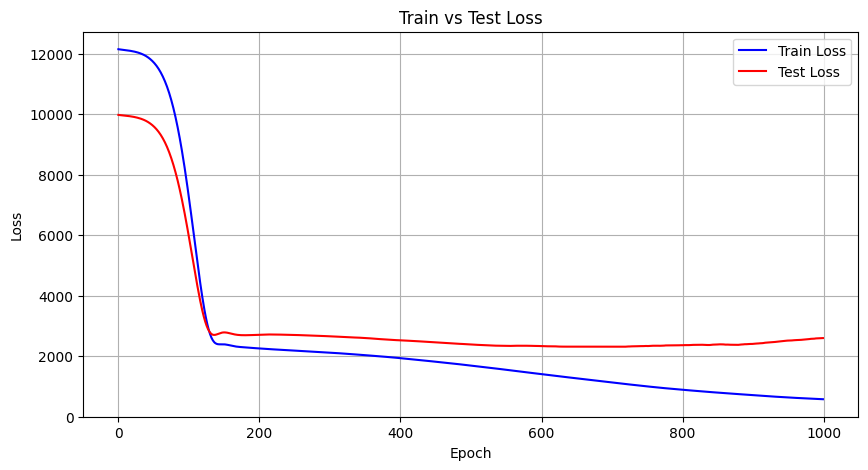

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()


# Model 11

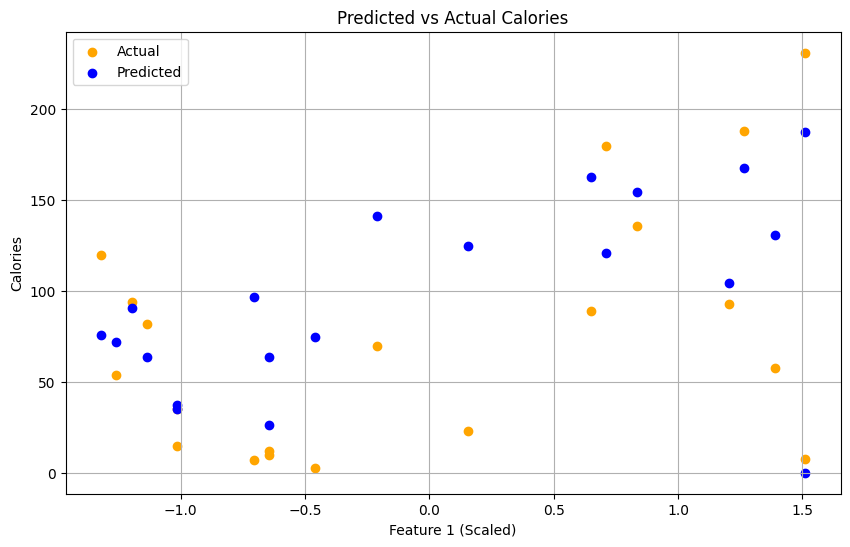

In [139]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_tensor[:, 0].numpy(), y_test_tensor.numpy(), color="orange", label="Actual")
plt.scatter(X_test_tensor[:, 0].numpy(), y_preds.numpy(), color="blue", label="Predicted")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Calories")
plt.title("Predicted vs Actual Calories")
plt.legend()
plt.grid(True)
plt.show()


# Model 12

In [140]:
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)


In [141]:
epochs = 2000
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)



Training model with fewer layers and nodes...
Epoch: 0 | Train loss: 12206.60742, Test loss: 10022.88965
Epoch: 200 | Train loss: 2104.98706, Test loss: 2618.87744
Epoch: 400 | Train loss: 1995.52478, Test loss: 2667.57446
Epoch: 600 | Train loss: 1955.53918, Test loss: 2639.81592
Epoch: 800 | Train loss: 1851.91846, Test loss: 2647.64600
Epoch: 1000 | Train loss: 1737.15149, Test loss: 2725.94995
Epoch: 1200 | Train loss: 1627.44446, Test loss: 2795.73267
Epoch: 1400 | Train loss: 1532.60413, Test loss: 2922.29932
Epoch: 1600 | Train loss: 1288.46252, Test loss: 3178.88379
Epoch: 1800 | Train loss: 1183.57996, Test loss: 3562.78369

Training finished for model with fewer layers and nodes.


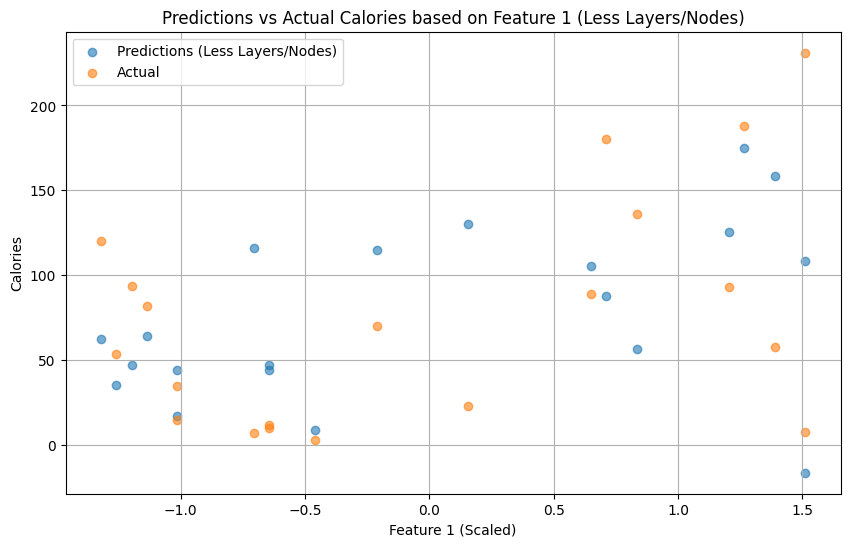

In [142]:
model_less_layers = nn.Sequential(
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=16), # Fewer nodes
    nn.RReLU(),
    nn.Linear(in_features=16, out_features=8), # Fewer nodes
    nn.RReLU(),
    nn.Linear(in_features=8, out_features=1) # Output layer
)

# Create an optimizer for the new model with fewer layers/nodes
optimizer_less = torch.optim.SGD(params=model_less_layers.parameters(),
                               lr=0.0001) # Same learning rate as before

print("\nTraining model with fewer layers and nodes...")

for epoch in range(epochs): # Using the same number of epochs as before
    ### Training
    model_less_layers.train()
    y_pred = model_less_layers(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze()) # Using the existing loss_fn

    optimizer_less.zero_grad()
    loss.backward()
    optimizer_less.step()

    ### Testing
    model_less_layers.eval()
    with torch.inference_mode():
      test_pred = model_less_layers(X_test_tensor)
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze()) # Using the existing loss_fn

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

print("\nTraining finished for model with fewer layers and nodes.")

# Evaluate and plot results for the new model
model_less_layers.eval()
with torch.inference_mode():
    y_preds_less = model_less_layers(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_to_plot_index], y_preds_less.detach().numpy(), label='Predictions (Less Layers/Nodes)', alpha=0.6)
plt.scatter(X_test[:, feature_to_plot_index], y_test, label='Actual', alpha=0.6)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Less Layers/Nodes)')
plt.legend()
plt.grid(True)
plt.show()

# Model 13


Training model with even fewer layers and nodes...
Epoch: 0 | Train loss: 12097.26562, Test loss: 9928.63867
Epoch: 200 | Train loss: 2252.81714, Test loss: 2496.86816
Epoch: 400 | Train loss: 2013.75696, Test loss: 2753.46143
Epoch: 600 | Train loss: 1948.16638, Test loss: 2780.76709
Epoch: 800 | Train loss: 1954.61377, Test loss: 2807.93408
Epoch: 1000 | Train loss: 1940.64282, Test loss: 2851.74365
Epoch: 1200 | Train loss: 1928.44104, Test loss: 2900.92969
Epoch: 1400 | Train loss: 1866.72449, Test loss: 2953.93164
Epoch: 1600 | Train loss: 1809.76111, Test loss: 3012.09424
Epoch: 1800 | Train loss: 1769.83826, Test loss: 2960.34131

Training finished for model with even fewer layers and nodes.


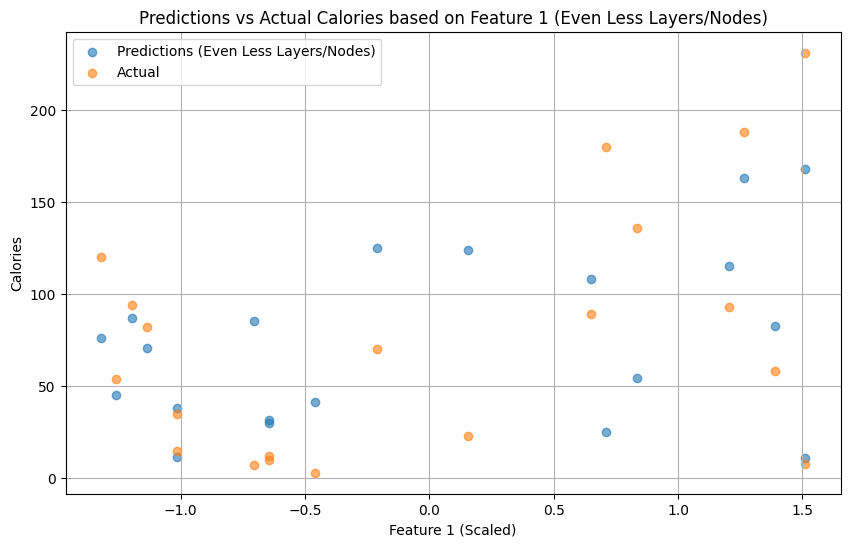

In [143]:

model_even_less_layers = nn.Sequential(
    nn.Linear(in_features=X_train_tensor.shape[1], out_features=8), # Even fewer nodes
    nn.RReLU(),
    nn.Linear(in_features=8, out_features=4), # Even fewer nodes
    nn.RReLU(),
    nn.Linear(in_features=4, out_features=1) # Output layer
)

# Create an optimizer for the new model with even fewer layers/nodes
optimizer_even_less = torch.optim.SGD(params=model_even_less_layers.parameters(),
                                   lr=0.0001) # Same learning rate

print("\nTraining model with even fewer layers and nodes...")

for epoch in range(epochs): # Using the same number of epochs
    ### Training
    model_even_less_layers.train()
    y_pred = model_even_less_layers(X_train_tensor)
    loss = loss_fn(y_pred.squeeze(), y_train_tensor.squeeze()) # Using the existing loss_fn

    optimizer_even_less.zero_grad()
    loss.backward()
    optimizer_even_less.step()

    ### Testing
    model_even_less_layers.eval()
    with torch.inference_mode():
      test_pred = model_even_less_layers(X_test_tensor)
      test_loss = loss_fn(test_pred.squeeze(), y_test_tensor.squeeze()) # Using the existing loss_fn

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

print("\nTraining finished for model with even fewer layers and nodes.")

# Evaluate and plot results for the new model
model_even_less_layers.eval()
with torch.inference_mode():
    y_preds_even_less = model_even_less_layers(X_test_tensor)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_to_plot_index], y_preds_even_less.detach().numpy(), label='Predictions (Even Less Layers/Nodes)', alpha=0.6)
plt.scatter(X_test[:, feature_to_plot_index], y_test, label='Actual', alpha=0.6)

plt.xlabel(f'Feature {feature_to_plot_index + 1} (Scaled)')
plt.ylabel('Calories')
plt.title(f'Predictions vs Actual Calories based on Feature {feature_to_plot_index + 1} (Even Less Layers/Nodes)')
plt.legend()
plt.grid(True)
plt.show()



By the end of this project, it became really clear that most of my models weren’t looking that great. A lot of them were either way too complex or just not trained properly, and the graphs didn’t show clean or reliable predictions. I thought stacking more layers and adding more nodes would make the model "smarter" but in reality, it just made things messy (like in model 9)like the predictions weren’t capturing the trends at all, and the losses were either flat or unpredictable. What surprised meis that Model 13, which had the fewest layers and smallest number of nodes, actually performed the best in terms of train loss. For example, Model 12 had a training loss bigger than Model 13, shoiwing a clear improvement just by simplifying the architecture. It didn’t try to overfit the data or do too much, it just kept it simple and focused, which helped it capture the relationship a little better between the features and calories more cleanly. The results weren’t perfect, but they were noticeably better than all the complex models before it.